### Adding the dataset from kaggle

In [23]:
!pip install kaggle

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Library

In [31]:
from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle_dataset/sms/spam.csv', encoding='latin-1')

In [33]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
df.dropna(axis=1, inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['v1'] = le.fit_transform(df['v1'])

In [36]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
print('df:', df.shape)

df: (5572, 2)


In [38]:
df.rename(columns={"v1":"Category","v2":"Message"}, inplace = True)

In [39]:
df['num_characters'] = df['Message'].apply(len)

In [40]:
from nltk import corpus
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [42]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
df.duplicated().sum()

403

In [45]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop = True, inplace = True)

In [46]:
df.head(105)

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
100,0,Okay name ur price as long as its legal! Wen c...,81,23,3
101,0,I'm still looking for a car to buy. And have n...,76,19,2
102,0,wow. You're right! I didn't mean to do that. I...,183,44,5
103,0,Umma my life and vava umma love you lot dear,44,10,1


In [47]:
df.duplicated().sum()

0

In [48]:
df.isna().sum()

Category          0
Message           0
num_characters    0
num_words         0
num_sentences     0
dtype: int64

In [49]:
df.isnull().sum()

Category          0
Message           0
num_characters    0
num_words         0
num_sentences     0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        5169 non-null   int64 
 1   Message         5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 202.0+ KB


In [51]:
df.describe()

,Category,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


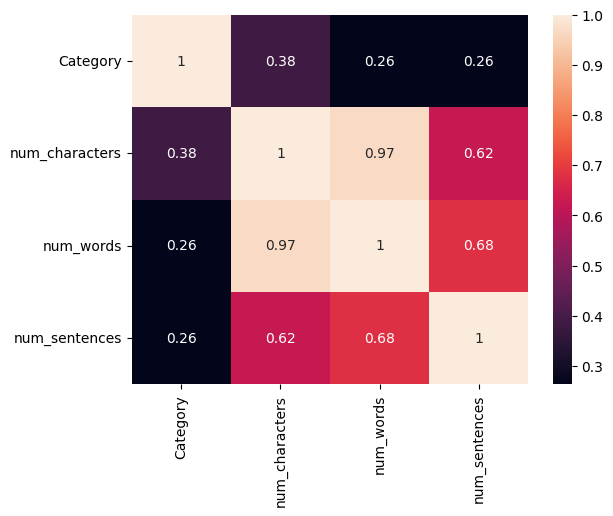

In [52]:
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

### Cleaning the data

In [53]:
all_stopwords = stopwords.words('english')
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
corpus = []
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-z]', ' ', df['Message'][i])
  review = review.lower()
  #print(review)
  review = review.split()
  #print(review)
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in all_stopwords]
  #print(review)
  review = ' '.join(review)
  #print(review)
  corpus.append(review)

In [55]:
corpus[0:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [56]:
df['transformed'] = corpus

In [57]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Data Visulaization

In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed'].str.cat(sep= ' '))

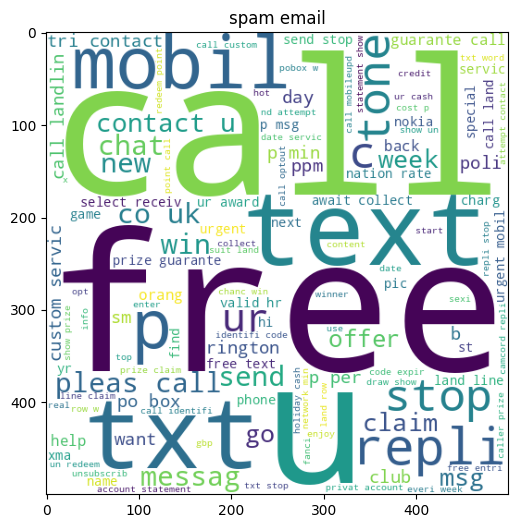

In [60]:
plt.figure(figsize=(15,6))
plt.title("spam email")
plt.imshow(spam_wc)

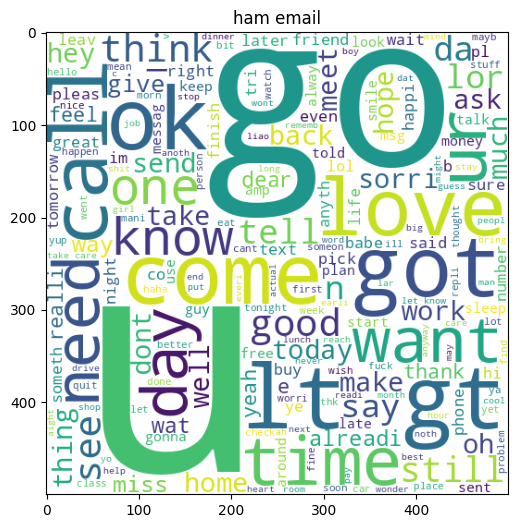

In [61]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed'].str.cat(sep= ' '))
plt.figure(figsize=(15,6))
plt.title("ham email")
plt.imshow(ham_wc)

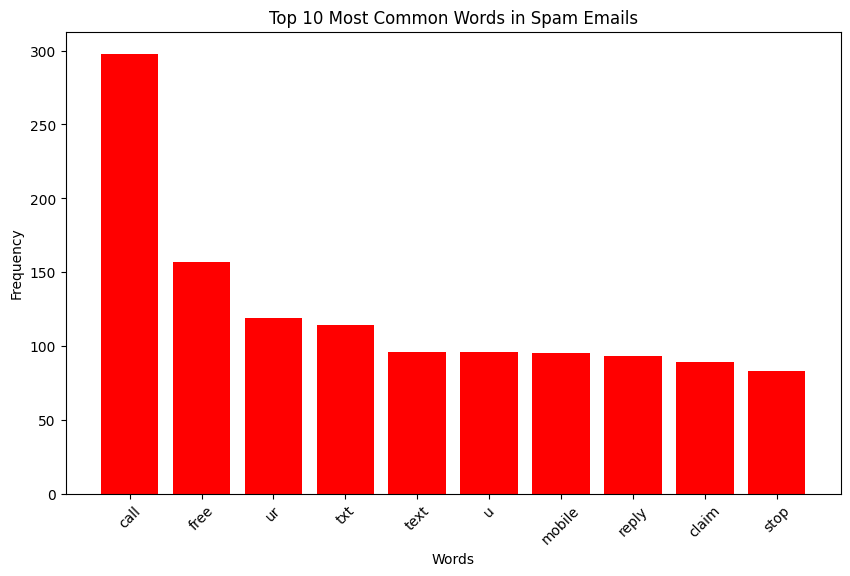

In [62]:
from collections import Counter

spam_words = " ".join(df[df['Category'] == 1]['Message']).split()
ham_words = " ".join(df[df['Category'] == 0]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in all_stopwords and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='r')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

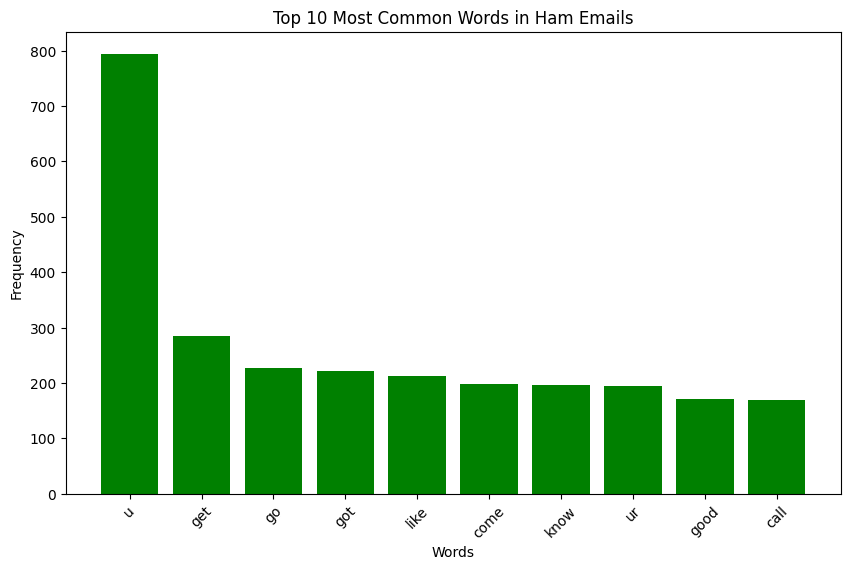

In [63]:
ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in all_stopwords and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()

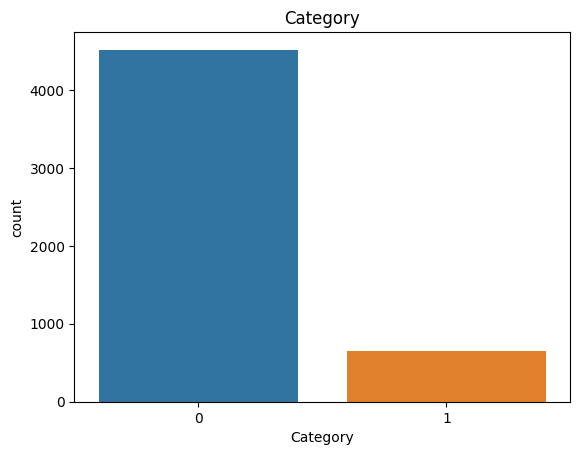

In [64]:
sns.countplot(x='Category', data=df)
plt.title('Category')
plt.show()

### Data preprocessing

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
y = df.iloc[:, 0:1].values

In [66]:
print('x shape', x.shape)
print('y shape', y.shape)

x shape (5169, 6251)
y shape (5169, 1)


### Splitting the dataset

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [68]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4135, 6251) (1034, 6251)
(4135, 1) (1034, 1)


In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training and testing the models

In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 42)
log.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [71]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
GB = GaussianNB()

GB.fit(x_train, y_train)


GaussianNB()

In [72]:
CB = BernoulliNB()
CB.fit(x_train, y_train)

BernoulliNB()

In [73]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [74]:
classifier = [log, svc, GB, CB]
model = ['Logistic', 'Support Vector', 'Naive Bayes GB', 'Naive Bayes CB']

## Making the Confusion Matrix


for Logistic:

Accuracy:  97.38878143133462
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.82      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



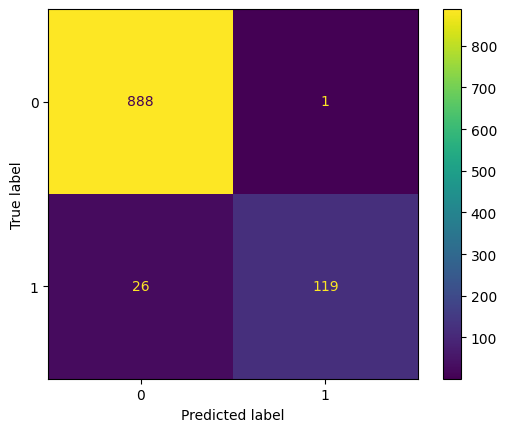


for Support Vector:

Accuracy:  96.90522243713733
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.98      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



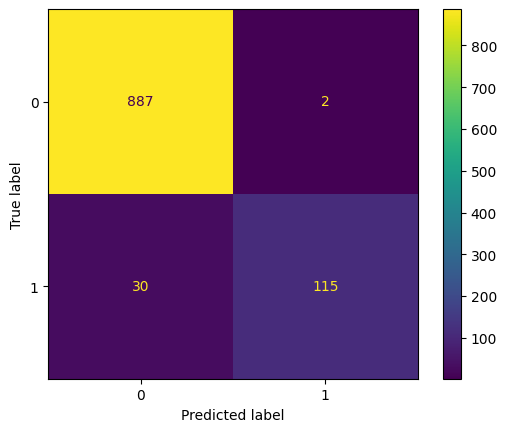


for Naive Bayes GB:

Accuracy:  84.13926499032883
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       889
           1       0.46      0.79      0.58       145

    accuracy                           0.84      1034
   macro avg       0.71      0.82      0.74      1034
weighted avg       0.89      0.84      0.86      1034



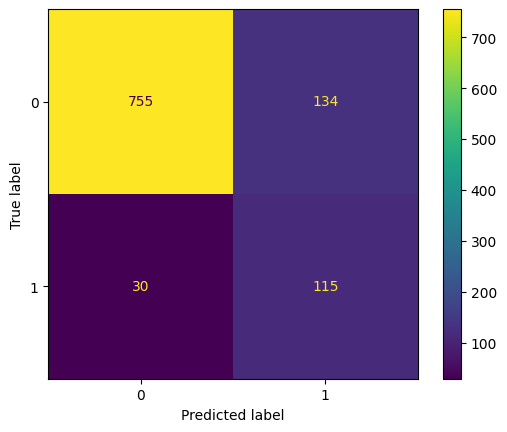


for Naive Bayes CB:

Accuracy:  97.1953578336557
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.95      0.84      0.89       145

    accuracy                           0.97      1034
   macro avg       0.96      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034



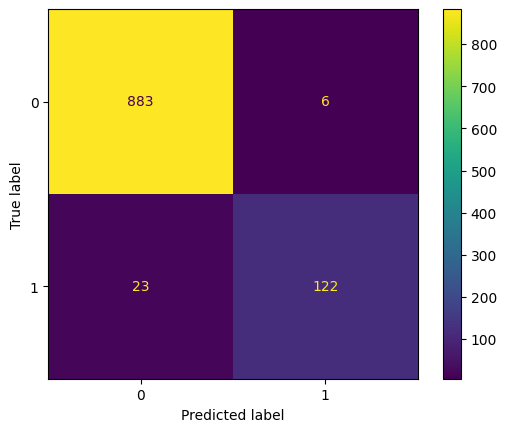

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
for i in range(0, len(classifier)):
  y_pred = classifier[i].predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)*100
  print('\nfor ' + str(model[i]) + ':\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  plt.rcParams['axes.grid'] = False
  disp.plot()
  print('Accuracy: ',accuracy)
  print(classification_report(y_test, y_pred))
  plt.show()

## Applying k-Fold Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
for i in classifier:
  accuracies  = cross_val_score(estimator=i, X = x_train, y = y_train, cv = 10)
  print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.78 %
Standard Deviation: 0.47 %
Accuracy: 96.42 %
Standard Deviation: 0.64 %
Accuracy: 85.10 %
Standard Deviation: 0.89 %
Accuracy: 97.22 %
Standard Deviation: 0.79 %
